In [6]:
import math as m
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import kv
import spinmob 
%matplotlib inline
import cmath as c
from sympy import symbols

# k-space numeric values

In [2]:
#spin orbit coupling
def Hsoc (lamda,x,y,a):
    x = x*a/2
    y = m.sqrt(3)*a*y/2
    return lamda*(2*m.sin(2*x)-4*m.sin(x)*m.cos(y))

#chemical potential 
def Hpot (lamda):
    return lamda

#tight binding
def Htb1 (t,x,y,a):
    x = x*a/2
    y = m.sqrt(3)*a*y/2
    return t*(1+2*m.cos(x)*m.cos(y))
def Htb2 (t,x,y,a) :
    x = x*a/2
    y = m.sqrt(3)*a*y/2
    return -2*t*m.cos(x)*m.sin(y)

#Rashba term (tight binding and spin)
def Hr1 (lamda,x,y,a):
    x = x*a/2
    y = m.sqrt(3)*a*y/2
    return lamda*(1-m.cos(x)*m.cos(y))

def Hr2 (lamda,x,y,a):
    x = x*a/2
    y = m.sqrt(3)*a*y/2
    return -m.sqrt(3)*lamda*m.sin(x)*m.sin(y)

def Hr3 (lamda,x,y,a):
    x = x*a/2
    y = m.sqrt(3)*a*y/2
    return -lamda*m.cos(x)*m.sin(y)

def Hr4 (lamda,x,y,a):
    x = x*a/2
    y = m.sqrt(3)*a*y/2
    return m.sqrt(3)*lamda*m.sin(x)*m.cos(y)
    


In [3]:
points = 100
a, pot, soc, tb, r = 1, 0.1, 0.05, 1, 0.06

Ham = np.zeros((4,4))
Energy = np.zeros((points,4))
x = 0
y = m.pi
increment = 2*m.pi/points

im = complex(0,1)

for i in range(points):
    Ham = np.array([[Hsoc(soc,x,y,a)+Hpot(pot), 0, Htb1(tb,x,y,a)+im*Htb2(tb,x,y,a), -im*Hr1(r,x,y,a)-Hr2(r,x,y,a)-Hr3(r,x,y,a)+im*Hr4(r,x,y,a)], 
                    [0, Hpot(pot)-Hsoc(soc,x,y,a), -im*Hr1(r,x,y,a)+Hr2(r,x,y,a)-Hr3(r,x,y,a)-im*Hr4(r,x,y,a), Htb1(tb,x,y,a)+im*Htb2(tb,x,y,a)],
                    [Htb1(tb,x,y,a)-im*Htb2(tb,x,y,a), im*Hr1(r,x,y,a)+Hr2(r,x,y,a)-Hr3(r,x,y,a)+im*Hr4(r,x,y,a), -Hsoc(soc,x,y,a)-Hpot(pot), 0], 
                    [im*Hr1(r,x,y,a)-Hr2(r,x,y,a)-Hr3(r,x,y,a)-im*Hr4(r,x,y,a), Htb1(tb,x,y,a)-im*Htb2(tb,x,y,a), 0, Hsoc(soc,x,y,a)-Hpot(pot)]],     dtype = complex)

#Check is matrix is hermitian
    if(((Ham.transpose().conjugate() == Ham).all())==False):
        print("not symmetric")
        
    
    Energy[i] = np.linalg.eigh(Ham)[0]
    x += increment
 #   if x == m.pi:
  #      x = -m.pi
   #     #y += increment
          
Energy1 = np.reshape(Energy,len(Energy)*len(Energy[0]))

        

(-1, 1)

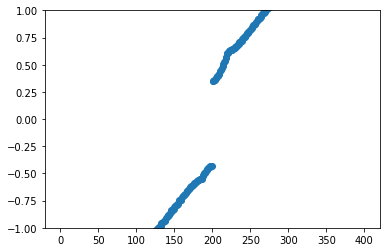

In [4]:
Energy1 = sorted(Energy1)
Energy1 = np.multiply(Energy1,1/tb)
X = np.linspace(0,len(Energy1),len(Energy1))
plt.scatter(X,Energy1)
plt.ylim(-1, 1)

In [5]:
Energy = np.multiply(Energy,1/tb)
Energy = np.transpose(Energy)
#for i in range(len(Energy)):
#    Energy[i] = sorted(Energy[i])
X = np.linspace(0,len(Energy[0]),len(Energy[0]))

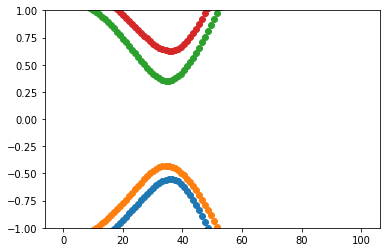

In [6]:
plt.clf()
plt.ylim(-1, 1)
plt.scatter(X,Energy[0])
plt.scatter(X,Energy[1])
plt.scatter(X,Energy[2])
plt.scatter(X,Energy[3])
plt.show()

# Using Sympy

In [7]:
#Using sympy:
from sympy import *
from sympy import I

#spin orbit coupling
def Hsoc (lamda,x,y,a):
    x = x*a/2
    y = sqrt(3)*a*y/2
    return lamda*(2*sin(2*x)-4*sin(x)*cos(y))

#chemical potential 
def Hpot (lamda):
    return lamda

#tight binding
def Htb1 (t,x,y,a):
    x = x*a/2
    y = sqrt(3)*a*y/2
    return t*(1+2*cos(x)*cos(y))
def Htb2 (t,x,y,a) :
    x = x*a/2
    y = sqrt(3)*a*y/2
    return -2*t*cos(x)*sin(y)

#Rashba term (tight binding and spin)
def Hr1 (lamda,x,y,a):
    x = x*a/2
    y = sqrt(3)*a*y/2
    return lamda*(1-cos(x)*cos(y))

def Hr2 (lamda,x,y,a):
    x = x*a/2
    y = sqrt(3)*a*y/2
    return -sqrt(3)*lamda*sin(x)*sin(y)

def Hr3 (lamda,x,y,a):
    x = x*a/2
    y = sqrt(3)*a*y/2
    return -lamda*cos(x)*sin(y)

def Hr4 (lamda,x,y,a):
    x = x*a/2
    y = sqrt(3)*a*y/2
    return sqrt(3)*lamda*sin(x)*cos(y)



In [8]:

x,y,z = symbols('x,y,z')
a, pot, soc, tb, r = 1, 0.1, 0.05, 1, 0.06

Ham = Matrix(4,4,[Hsoc(soc,x,y,a), 0, Htb1(tb,x,y,a)+I*Htb2(tb,x,y,a), -I*Hr1(r,x,y,a)-Hr2(r,x,y,a)-Hr3(r,x,y,a)+I*Hr4(r,x,y,a), 
                    0, -Hsoc(soc,x,y,a), -I*Hr1(r,x,y,a)+Hr2(r,x,y,a)-Hr3(r,x,y,a)-I*Hr4(r,x,y,a), Htb1(tb,x,y,a)+I*Htb2(tb,x,y,a),
                    Htb1(tb,x,y,a)-I*Htb2(tb,x,y,a), I*Hr1(r,x,y,a)+Hr2(r,x,y,a)-Hr3(r,x,y,a)+I*Hr4(r,x,y,a), -Hsoc(soc,x,y,a), 0, 
                    I*Hr1(r,x,y,a)-Hr2(r,x,y,a)-Hr3(r,x,y,a)-I*Hr4(r,x,y,a), Htb1(tb,x,y,a)-I*Htb2(tb,x,y,a), 0, Hsoc(soc,x,y,a)])


In [9]:
Ham

Matrix([
[                                                                                                                    -0.2*sin(x/2)*cos(sqrt(3)*y/2) + 0.1*sin(x),                                                                                                                                                               0,                                                                                                 -2*I*sin(sqrt(3)*y/2)*cos(x/2) + 2*cos(x/2)*cos(sqrt(3)*y/2) + 1, -I*(-0.06*cos(x/2)*cos(sqrt(3)*y/2) + 0.06) + 0.06*sqrt(3)*sin(x/2)*sin(sqrt(3)*y/2) + 0.06*sqrt(3)*I*sin(x/2)*cos(sqrt(3)*y/2) + 0.06*sin(sqrt(3)*y/2)*cos(x/2)],
[                                                                                                                                                              0,                                                                                                                      0.2*sin(x/2)*cos(sqrt(3)*y/2) - 0.1*sin(x), -I*(-0.06*cos(x/2)*c

In [10]:
D = Ham.is_diagonalizable()

KeyboardInterrupt: 

In [347]:
x,y = symbols('x,y')

H1 = lambdify( [x,y], D[0] )
H2 = lambdify( [x,y], D[5] )
H3 = lambdify( [x,y], D[10] )
H4 = lambdify( [x,y], D[15] )

D[0] == D[5]

KeyError: 0

In [31]:
x = 3
y = -3
I = complex(0,1)
def conjugate(a):
    return a.conjugate()
def sqrt(a):
    return np.sqrt(a)
def exp(a):
    return np.exp(a)
def cos(a):
    return np.cos(a)
def sin(a):
    return np.sin(a)


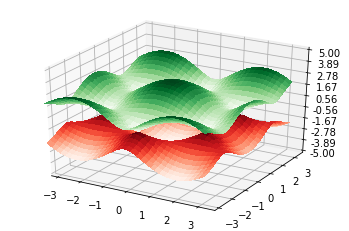

In [35]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

#plotting total wavefunction

fig = plt.figure()
ax = fig.gca(projection='3d')
x_range = m.pi+0.2
y_range = m.pi+0.2
# Make data.
X = np.arange(-x_range, x_range, 0.1)
Y = np.arange(-y_range, y_range, 0.1)
X, Y = np.meshgrid(X, Y)
#R = np.sqrt(X**2 + Y**2)


# Plot the surface.
surf1 = ax.plot_surface(X, Y, H1(X,Y).real, cmap=cm.Blues,
                       linewidth=0, antialiased=False)

surf2 = ax.plot_surface(X, Y, H2(X,Y).real, cmap=cm.Reds,
                       linewidth=0, antialiased=False)

surf3 = ax.plot_surface(X, Y, H3(X,Y).real, cmap=cm.Greys,
                       linewidth=0, antialiased=False)

surf4 = ax.plot_surface(X, Y, H4(X,Y).real, cmap=cm.Greens,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-5, 5)
ax.set_xlim(-x_range+0.2,x_range+0.2)
ax.set_ylim(-y_range+0.2,y_range+0.2)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
#fig.colorbar(surf1, shrink=0.5, aspect=5)
#fig.colorbar(surf2, shrink=0.5, aspect=5)
#fig.colorbar(surf3, shrink=0.5, aspect=5)
#fig.colorbar(surf4, shrink=0.5, aspect=5)

#plt.show()
# rotate the axes and update
#ax.view_init(0, 0)
plt.draw()

In [34]:
print(Hr(1,x,y))
print(Hrh(1,x,y))


NameError: name 'Hr' is not defined

# Position Space

In [212]:
#creates zero square matrix of length 2*points**2
def createMatrix(x,y):
    if(y%4 != 0 or x%2 != 0):
        return print("Error: y must be a mutliple of 4 \n       x must be a multiple of 2")
    points = 2*x*y #the 2 is for spin up and down
    ham = np.zeros((points,points))
    return ham

def grapheneHam(x,y,tb,soc,pot,rash,p):
    
    Ham = createMatrix(x,y) #Ham is the hamiltonian matrix
    
    if(type(Ham) == type(None)): #checks for error in dimensions of matrix (check createMatrix method)
        return
    f_tb(x,y,Ham,tb,p)
        
    return Ham

#puts potential term in hamiltonian
#first row (a) has poditive pot, second (b) had negative, so on..
def f_pot(x,y,ham,pot):
    pot = -pot
    for i in range(len(ham)):
        if (i%x == 0):
            pot = -pot
        ham[i][i] += pot
        
    return

def f_soc(ham,soc):
    if(soc == 0):
        return
    shift = 0
    length = len(ham)
    sublatice = -1 #if sublatice a =1, if b = -1. this starts matrix eith lattice a (**)

    for i in range(length):

        if(i % x == 0):
            sublatice = -1*sublatice  #change sublattice every new row (**)

        if(sublatice == 1):  #if sub-lattice a
            #to know the shift of lattice point
            if(i%(4*x)== 0):
                shift = -1
            elif((i-2*x)%(4*x)==0):
                shift = +1
            
            #point --> top --> top_left
            nn = top(x,y,i,shift,p)
            if(nn != None): #nn = nearest neighbor
                snn1 = top_left(x,y,nn,shift,p) #snn = second nearest neighbor
                if(snn1 != None):
                    ham[i][snn1] += soc
                sn2 = top_right(x,y,nn,shift)
            #point -- top -- top_right
            
                
        
        elif(sublatice == -1):  #if sub-lattice b
            
    return

def f_tb(x,y,ham,tb,p):
    if(tb == 0):
        return
    shift = 0
    length = len(ham)
    sublatice = -1 #if sublatice a =1, if b = -1. this starts matrix eith lattice a (**)
    
    for i in range(length):

        if(i % x == 0):
            sublatice = -1*sublatice  #change sublattice every new row (**)

        if(sublatice == 1): #if sub-lattice a
            #to know the shift of lattice point
            if(i%(4*x)== 0):
                shift = -1
            elif((i-2*x)%(4*x)==0):
                shift = +1
            
            #bottom right neighbor
            if(not(shift == 1 and (i+1)%x == 0)): #check if at edge
                if(shift == 1): #right shifted
                    ham[i][i+x+1] += tb 
                else: #shifted left
                    ham[i][i+x] += tb
            elif(p == 1): #if periodic boundary
                ham[i][i+1] += tb #bottom allllll the way left
            
            #top neighbor
            if( (x*y>i>=x) or (x*(y+1)<= i)): #check if at edge
                ham[i][i-x] += tb #top neighbor
            elif(p==1):
                ham[i][i+x*(y-1)] += tb #most bottom under it
              
            #bottom left neighbor
            if(i%(x*4) != 0): #check if at edge
                if(shift == 1):
                    ham[i][i+x] += tb #bottom left neighbor
                else:
                    ham[i][i+x-1] +=tb
            elif(p==1):
                ham[i][i+2*x-1] += tb #bottom allll the way right neighbor

                
        elif(sublatice == -1): #if sub-lattice b
            #to know the shift of lattice point
            if((i-x)%(4*x) == 0):
                shift =1
            elif((i-3*x)%(4*x) == 0):
                shift = -1
            
            #bottom neighbor
            if((not(x*(y-1)<= i < x*y)) and (not(length-x<=i<length))): #check if at edge
                ham[i][i+x] += tb #bottom neighbor
            elif(p == 1): #if periodic boundary
                ham[i][i-x*(y-1)] += tb

            #top left neighbor
            if((i-3*x)%(4*x) != 0): #check if at edge
                if(shift == 1):
                    ham[i][i-x] += tb #top left neighbor
                else:
                    ham[i][i-x-1] += tb
            elif(p==1):
                ham[i][i-1] += tb
                
            #top right neighbor
            if(not(shift == 1 and (i+1)%x == 0)): #check if at edge
                if(shift == 1):
                    ham[i][i-x+1] += tb #top right neighbor
                else:
                    ham[i][i-x] += tb
            elif(p==1):
                ham[i][i-2*x+1] += tb      
    return

#the methods below return the index of a specific neighbor 
#or returns None if there is no neighbor {
def top_right(x,y,i,shift,p):
    if(not(shift == 1 and (i+1)%x == 0)): #check if at edge
        if(shift == 1):
            return i-x+1  #top right neighbor
        else:
            return i-x 
    elif(p==1):
        return i-2*x+1
    return None

def top_left(x,y,i,shift,p):
    if((i-3*x)%(4*x) != 0): #check if at edge
        if(shift == 1):
            return i-x #top left neighbor
        else:
            return i-x-1
    elif(p==1):
        return i-1
    return None

def bottom(x,y,i,shift,p):
    length = x*y*2
    #bottom neighbor
    if((not(x*(y-1)<= i < x*y)) and (not(length-x<=i<length))): #check if at edge
        return i+x
    elif(p == 1): #if periodic boundary
        return i-x*(y-1)  
    return None

def bottom_left(x,y,i,shift,p):
    #bottom left neighbor
    if(i%(x*4) != 0): #check if at edge
        if(shift == 1):
            return i+x #bottom left neighbor
        else:
            return i+x-1
    elif(p==1):
        return i+2*x-1 #bottom allll the way right neighbor
    return None

def bottom_right(x,y,i,shift,p):
    #bottom right neighbor
    if(not(shift == 1 and (i+1)%x == 0)): #check if at edge
        if(shift == 1): #right shifted
            return i+x+1
        else: #shifted left
            return i+x
    elif(p == 1): #if periodic boundary
        return i+1
    return None

def top(x,y,i,shift,p):
    #top neighbor
    if( (x*y>i>=x) or (x*(y+1)<= i)): #check if at edge
        return i-x
    elif(p==1):
        return i+x*(y-1)  
    return None
#end of methods that return neighbor index }    

In [233]:
import sys
x,y= 2,8
tb,soc,pot,rash,p = 1,0,0,0,1
Ham = grapheneHam(x,y,tb,soc,pot,rash,p)
np.set_printoptions(threshold=sys.maxsize)
Ham

array([[0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [234]:
Ham[0]

array([0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [227]:
for i in range(4):
    print(i)

0
1
2
3


In [69]:
tb, sox, v, rash = 0,0,0,0
x, y = 2,2

grapheneHam(x,y,tb,soc,v,rash)

Error: y must be a mutliple of 4 
       x must be a multiple of 2
